## Implementation of CNN
#### Classification Problem
Using cifar10 dataset

In this project we would try to build an Convolusion Neural Network that would classify the objects in the colored images i.e. whether the object in the image is a cat or a dog, etc. The images of the cifar10 dataset are RGB image with 3 color channels (red, green, blue).

Using Lenet Architecture : A Lenet architecture consists of two convolusional layers and three fully connected layers)

In [41]:
## importing necessary librares
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.warn('ignore')

<ipython-input-41-4e1737fee14b>:9: UserWarning: ignore
  warnings.warn('ignore')


In [42]:
from keras.datasets import cifar10

In [95]:
## image categories
cifar10_class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [44]:
## train-test split
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [45]:
## splitting the data into training, validation and test data and also scaling the input data
## each of the pixel value ranges from 0 to 255
## so we can divide the input features of the training, validation, and test data with 255

x_valid , x_train = x_train_full[:5000]/255 , x_train_full[5000:]/255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

x_test = x_test/255


In [46]:
print('Number of training samples :', len(x_train))
print('Number of validation samples :', len(x_valid))
print('Number of test samples :', len(x_test))

Number of training samples : 45000
Number of validation samples : 5000
Number of test samples : 10000


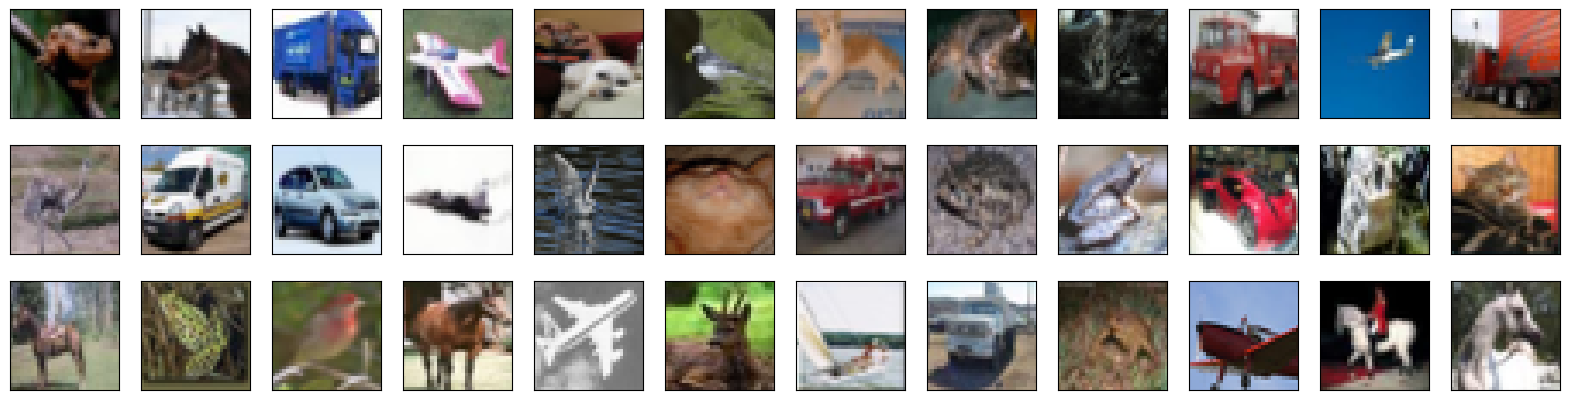

In [47]:
## Visualizing some of the images of the cifar10 dataset

figure = plt.figure(figsize=(20,5))
for i in range(36):
  image = figure.add_subplot(3,12,i+1, xticks=[], yticks=[])
  image.imshow(np.squeeze(x_train[i]))

In [48]:
## an image is a 4D tensor : (sample_size * height * width * number of color channels)

print('Shape of training images', x_train.shape)
print('Shape of validation images', x_valid.shape)
print('Shape of test images', x_test.shape)

Shape of training images (45000, 32, 32, 3)
Shape of validation images (5000, 32, 32, 3)
Shape of test images (10000, 32, 32, 3)


Model Building

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

## First Layer of Convolusion
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='tanh', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

## Second Layer of Convolusion
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

## First Dense Layer
model.add(Dense(50, activation='tanh'))

## Second Dense Layer
model.add(Dense(25, activation='tanh'))

## Output layer
model.add(Dense(10, activation='softmax')) ## 10 neurons because of 10 classes

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 50)               

CallBacks

In [63]:
checkpoint_path = 'Model_Checkpoint.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only = True)

Model Training

In [64]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_valid, y_valid),
                    callbacks=[model_checkpoint_callback], verbose = 2, shuffle = True)

Epoch 1/20
704/704 - 40s - loss: 1.5356 - accuracy: 0.4554 - val_loss: 1.3828 - val_accuracy: 0.5224 - 40s/epoch - 57ms/step
Epoch 2/20
704/704 - 38s - loss: 1.1940 - accuracy: 0.5784 - val_loss: 1.1989 - val_accuracy: 0.5820 - 38s/epoch - 54ms/step
Epoch 3/20
704/704 - 38s - loss: 1.0592 - accuracy: 0.6288 - val_loss: 1.1818 - val_accuracy: 0.5838 - 38s/epoch - 54ms/step
Epoch 4/20
704/704 - 38s - loss: 0.9735 - accuracy: 0.6594 - val_loss: 1.1199 - val_accuracy: 0.6090 - 38s/epoch - 54ms/step
Epoch 5/20
704/704 - 39s - loss: 0.9093 - accuracy: 0.6822 - val_loss: 1.1096 - val_accuracy: 0.6198 - 39s/epoch - 56ms/step
Epoch 6/20
704/704 - 37s - loss: 0.8519 - accuracy: 0.7012 - val_loss: 1.0821 - val_accuracy: 0.6274 - 37s/epoch - 53ms/step
Epoch 7/20
704/704 - 37s - loss: 0.7968 - accuracy: 0.7235 - val_loss: 1.0428 - val_accuracy: 0.6500 - 37s/epoch - 53ms/step
Epoch 8/20
704/704 - 38s - loss: 0.7513 - accuracy: 0.7392 - val_loss: 1.0884 - val_accuracy: 0.6358 - 38s/epoch - 54ms/step


In [66]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.535581,0.455400,1.382826,0.5224
1,1.193963,0.578422,1.198877,0.5820
2,1.059194,0.628822,1.181803,0.5838
3,0.973540,0.659378,1.119887,0.6090
4,0.909324,0.682200,1.109603,0.6198
5,0.851939,0.701222,1.082106,0.6274
6,0.796755,0.723511,1.042826,0.6500
7,0.751342,0.739244,1.088356,0.6358
8,0.703502,0.756022,1.119306,0.6294
9,0.663358,0.771933,1.108227,0.6382


<Axes: >

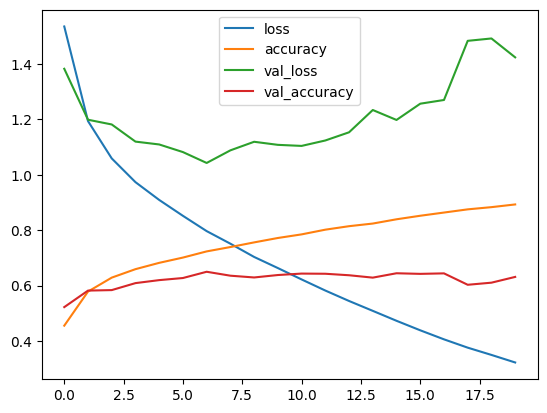

In [67]:
pd.DataFrame(history.history).plot()

Loading Checkpoint Model : Using the best model

In [91]:
checkpoint_model = tf.keras.models.load_model(checkpoint_path)

In [92]:
score = checkpoint_model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.0649 - accuracy: 0.6369


In [93]:
print('The model accuracy is', score[1]*100, '%')

The model accuracy is 63.690000772476196 %


In [94]:
y_pred = checkpoint_model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [104]:
y_pred

array([[8.2222428e-03, 1.7367853e-03, 9.3350764e-03, ..., 3.0003008e-03,
        9.1025084e-02, 1.1507877e-02],
       [5.5360146e-02, 2.2751784e-01, 1.3695138e-04, ..., 5.6487221e-05,
        6.8198293e-01, 3.4580406e-02],
       [3.5870984e-01, 2.0062208e-01, 2.9983807e-02, ..., 5.2773636e-02,
        2.0839308e-01, 1.1743922e-01],
       ...,
       [1.4354056e-04, 9.4612398e-05, 4.1569673e-02, ..., 3.5522159e-02,
        8.9153351e-04, 7.2124810e-04],
       [1.0859860e-01, 7.8708786e-01, 6.4859274e-03, ..., 6.5270014e-04,
        1.8548949e-03, 7.2262548e-03],
       [2.5705751e-05, 8.0396814e-05, 6.1414408e-04, ..., 9.7404271e-01,
        1.1644402e-05, 1.8891369e-04]], dtype=float32)

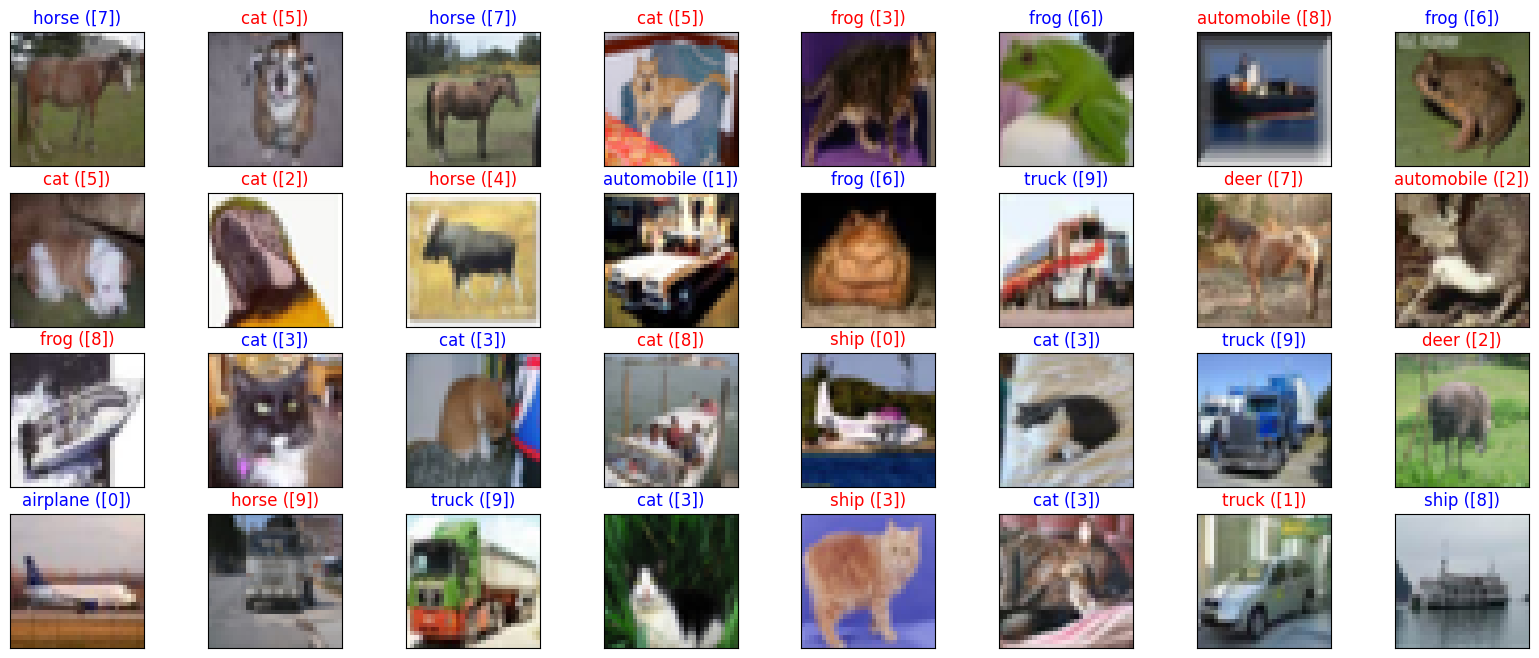

In [117]:
## visualizing the predicted labels with the true labels

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    image = figure.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    image.imshow(np.squeeze(x_test[index]))
    pred_index = np.argmax(y_pred[index])
    true_index = y_test[index]
    title = "{} ({})".format(cifar10_class_names[pred_index], true_index)
    color = "blue" if pred_index == true_index else "red"
    image.set_title(title, color=color)


For every title of each image, the name is the predicted label of the corresponding image and the index adjacent to it is the true index of the corresponding image.

In [118]:
# from the above result we can tally the 'true_index' with the 'cifar10_class_names' dictionary to get the corresponding true labels

cifar10_class_names

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

All images with blue labels are correct predictions and all images with red labels are wrong predictions.